### Importing Libraries

In [678]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor


import warnings
warnings.filterwarnings('ignore')

# Importing and understanding Data

In [679]:
edu = pd.read_csv("Leads.csv")
edu.head()

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source Do Not Email Do Not Call  Converted  TotalVisits  \
0      Olark Chat           No          No          0          0.0   
1  Organic Search           No          No          0          5.0   
2  Direct Traffic           No          No          1          2.0   
3  Direct Traffic           No          No          0          1.0   
4          Google           No          No          1          2.0   

   Total Time Spent on Website  Page Views Per Visit            Last Activity  \
0                            0                   0.0  Page Visited on Website   
1                          674                   2.5             Email Opened   
2                         1532                   2.0             Email Opened   
3                          305                   1.0              Unreachable   
4                         1428                   1.0        Converted to Lead   

  Country           Specialization How did you hear about X Education  \
0     NaN                   Select                             Select   
1   India                   Select                             Select   
2   India  Business Administration                             Select   
3   India    Media and Advertising                      Word Of Mouth   
4   India                   Select                              Other   

  What is your current occupation  \
0                      Unemployed   
1                      Unemployed   
2                         Student   
3                      Unemployed   
4                      Unemployed   

  What matters most to you in choosing a course Search Magazine  \
0                       Better Career Prospects     No       No   
1                       Better Career Prospects     No       No   
2                       Better Career Prospects     No       No   
3                       Better Career Prospects     No       No   
4                       Better Career Prospects     No       No   

  Newspaper Article X Education Forums Newspaper Digital Advertisement  \
0                No                 No        No                    No   
1                No                 No        No                    No   
2                No                 No        No                    No   
3                No                 No        No                    No   
4                No                 No        No                    No   

  Through Recommendations Receive More Updates About Our Courses  \
0                      No                                     No   
1                      No                                     No   
2                      No                                     No   
3                      No                                     No   
4                      No                                     No   

                                  Tags      Lead Quality  \
0          Interested in other courses  Low in Relevance   
1                              Ringing               NaN   
2  Will revert after reading the email          Might be   
3                              Ringing          Not Sure   
4  Will revert after reading the email          Might be   

  Update me on Supply Chain Content Get updates on DM Content    Lead Profile  \
0                                No                        No          Select   
1                                No                        No          Select   
2                                No                        No  Potential Lead   
3                            

In [680]:
edu.shape

(9240, 37)

In [681]:
edu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [682]:
edu.describe()

Lead Number    Converted  TotalVisits  Total Time Spent on Website  \
count    9240.000000  9240.000000  9103.000000                  9240.000000   
mean   617188.435606     0.385390     3.445238                   487.698268   
std     23405.995698     0.486714     4.854853                   548.021466   
min    579533.000000     0.000000     0.000000                     0.000000   
25%    596484.500000     0.000000     1.000000                    12.000000   
50%    615479.000000     0.000000     3.000000                   248.000000   
75%    637387.250000     1.000000     5.000000                   936.000000   
max    660737.000000     1.000000   251.000000                  2272.000000   

       Page Views Per Visit  Asymmetrique Activity Score  \
count           9103.000000                  5022.000000   
mean               2.362820                    14.306252   
std                2.161418                     1.386694   
min                0.000000                     7.000000   
25%                1.000000                    14.000000   
50%                2.000000                    14.000000   
75%                3.000000                    15.000000   
max               55.000000                    18.000000   

       Asymmetrique Profile Score  
count                 5022.000000  
mean                    16.344883  
std                      1.811395  
min                     11.000000  
25%                     15.000000  
50%                     16.000000  
75%                     18.000000  
max                     20.000000

In [683]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Data Cleaning

### Treating null values

In [684]:
edu.isnull().sum()/9240

Prospect ID                                      0.000000
Lead Number                                      0.000000
Lead Origin                                      0.000000
Lead Source                                      0.003896
Do Not Email                                     0.000000
Do Not Call                                      0.000000
Converted                                        0.000000
TotalVisits                                      0.014827
Total Time Spent on Website                      0.000000
Page Views Per Visit                             0.014827
Last Activity                                    0.011147
Country                                          0.266342
Specialization                                   0.155628
How did you hear about X Education               0.238853
What is your current occupation                  0.291126
What matters most to you in choosing a course    0.293182
Search                                           0.000000
Magazine      

Replacing all values which are "Select" as null. Conservatively performing the operation for all columns.

In [685]:
edu.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [686]:
edu.replace({'Select': None},inplace =True)

In [687]:
edu.isnull().sum()/9240

Prospect ID                                      0.000000
Lead Number                                      0.000000
Lead Origin                                      0.000000
Lead Source                                      0.003896
Do Not Email                                     0.000000
Do Not Call                                      0.000000
Converted                                        0.000000
TotalVisits                                      0.014827
Total Time Spent on Website                      0.000000
Page Views Per Visit                             0.014827
Last Activity                                    0.011147
Country                                          0.266342
Specialization                                   0.365801
How did you hear about X Education               0.784632
What is your current occupation                  0.291126
What matters most to you in choosing a course    0.293182
Search                                           0.000000
Magazine      

In [688]:
# Dropping columns,whereever null value is more than around 40%

edu.drop(columns = ['How did you hear about X Education', 'Lead Quality', 'Lead Profile','City','Asymmetrique Activity Index', 'Asymmetrique Profile Index','Asymmetrique Activity Score','Asymmetrique Profile Score'], inplace = True)

In [689]:
edu.shape

(9240, 29)

In [690]:
# Dropping following additional columns which are generated by Sales team and not required for analysis, and also futher non-necessary columns

edu.drop(columns = ['Prospect ID','Tags', 'Last Activity', 'Last Notable Activity'], inplace = True)

In [691]:
edu.shape

(9240, 25)

In [692]:
edu.head()

Lead Number              Lead Origin     Lead Source Do Not Email  \
0       660737                      API      Olark Chat           No   
1       660728                      API  Organic Search           No   
2       660727  Landing Page Submission  Direct Traffic           No   
3       660719  Landing Page Submission  Direct Traffic           No   
4       660681  Landing Page Submission          Google           No   

  Do Not Call  Converted  TotalVisits  Total Time Spent on Website  \
0          No          0          0.0                            0   
1          No          0          5.0                          674   
2          No          1          2.0                         1532   
3          No          0          1.0                          305   
4          No          1          2.0                         1428   

   Page Views Per Visit Country           Specialization  \
0                   0.0     NaN                     None   
1                   2.5   India                     None   
2                   2.0   India  Business Administration   
3                   1.0   India    Media and Advertising   
4                   1.0   India                     None   

  What is your current occupation  \
0                      Unemployed   
1                      Unemployed   
2                         Student   
3                      Unemployed   
4                      Unemployed   

  What matters most to you in choosing a course Search Magazine  \
0                       Better Career Prospects     No       No   
1                       Better Career Prospects     No       No   
2                       Better Career Prospects     No       No   
3                       Better Career Prospects     No       No   
4                       Better Career Prospects     No       No   

  Newspaper Article X Education Forums Newspaper Digital Advertisement  \
0                No                 No        No                    No   
1                No                 No        No                    No   
2                No                 No        No                    No   
3                No                 No        No                    No   
4                No                 No        No                    No   

  Through Recommendations Receive More Updates About Our Courses  \
0                      No                                     No   
1                      No                                     No   
2                      No                                     No   
3                      No                                     No   
4                      No                                     No   

  Update me on Supply Chain Content Get updates on DM Content  \
0                                No                        No   
1                                No                        No   
2                                No                        No   
3                                No                        No   
4                                No                        No   

  I agree to pay the amount through cheque  \
0                                       No   
1                                       No   
2                                       No   
3                                       No   
4                                       No   

  A free copy of Mastering The Interview  
0                                     No  
1                                     No  
2                                    Yes  
3                                     No  
4                                     No

In [693]:
edu.isnull().sum()

Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Country                                          2461
Specialization                                   3380
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article                                   0
X Education Forums                                  0
Newspaper                                           0
Digital Advertisement       

In [694]:
# Analysing and Dropping categorical columns which are skewed/ combining where categories' percentage is too low

edu['Lead Origin'].value_counts(normalize = True)

Landing Page Submission    0.528788
API                        0.387446
Lead Add Form              0.077706
Lead Import                0.005952
Quick Add Form             0.000108
Name: Lead Origin, dtype: float64

In [695]:
# Combining categories with less than 10% as "Others" in "Lead Origin"

edu['Lead Origin'].replace(to_replace = ['Lead Add Form','Lead Import','Quick Add Form'], value = 'Other Origins', inplace = True)

In [696]:
edu['Lead Origin'].value_counts(normalize = True)

Landing Page Submission    0.528788
API                        0.387446
Other Origins              0.083766
Name: Lead Origin, dtype: float64

In [697]:
edu['Lead Source'].value_counts(normalize = True)

Google               0.311604
Direct Traffic       0.276293
Olark Chat           0.190678
Organic Search       0.125380
Reference            0.058018
Welingak Website     0.015428
Referral Sites       0.013581
Facebook             0.005976
bing                 0.000652
google               0.000543
Click2call           0.000435
Live Chat            0.000217
Social Media         0.000217
Press_Release        0.000217
WeLearn              0.000109
Pay per Click Ads    0.000109
welearnblog_Home     0.000109
blog                 0.000109
youtubechannel       0.000109
NC_EDM               0.000109
testone              0.000109
Name: Lead Source, dtype: float64

In [698]:
# Combining categories with less than 10% as "Others" in "Lead Source"

edu['Lead Source'][~edu['Lead Source'].isin(['Google','Direct Traffic','Olark Chat','Organic Search'])] = 'Others'

In [699]:
# Also imputing the mode - 'Google' for null values in "Lead Source"

edu['Lead Source'].fillna("Google", inplace = True)

In [700]:
edu['Lead Source'].value_counts(normalize = True)

Google            0.310390
Direct Traffic    0.275216
Olark Chat        0.189935
Organic Search    0.124892
Others            0.099567
Name: Lead Source, dtype: float64

In [701]:
edu['Do Not Email'].value_counts(normalize = True)

No     0.920563
Yes    0.079437
Name: Do Not Email, dtype: float64

In [702]:
# Converting Yes and No as 0 and 1 in "Do Not Email"

edu['Do Not Email'][edu['Do Not Email'] == 'No'] = 0
edu['Do Not Email'][edu['Do Not Email'] == 'Yes'] = 1

In [703]:
edu['Do Not Email'].value_counts(normalize = True)

0    0.920563
1    0.079437
Name: Do Not Email, dtype: float64

In [704]:
edu['Do Not Call'].value_counts(normalize = True)

No     0.999784
Yes    0.000216
Name: Do Not Call, dtype: float64

In [705]:
# Dropping the following column as it is skewed.

edu.drop(columns = 'Do Not Call', inplace = True)

In [706]:
edu.Converted.value_counts(normalize = True)

0    0.61461
1    0.38539
Name: Converted, dtype: float64

In [707]:
edu['TotalVisits'].value_counts(normalize = True)

0.0      0.240470
2.0      0.184555
3.0      0.143469
4.0      0.123036
5.0      0.086016
6.0      0.051192
1.0      0.043392
7.0      0.033945
8.0      0.024607
9.0      0.018016
10.0     0.012523
11.0     0.009447
13.0     0.005273
12.0     0.004943
14.0     0.003955
16.0     0.002307
15.0     0.001977
17.0     0.001758
18.0     0.001648
20.0     0.001318
19.0     0.000989
23.0     0.000659
21.0     0.000659
27.0     0.000549
24.0     0.000549
25.0     0.000549
22.0     0.000330
28.0     0.000220
29.0     0.000220
26.0     0.000220
251.0    0.000110
74.0     0.000110
30.0     0.000110
141.0    0.000110
54.0     0.000110
41.0     0.000110
115.0    0.000110
43.0     0.000110
42.0     0.000110
32.0     0.000110
55.0     0.000110
Name: TotalVisits, dtype: float64

In [708]:
# Imputing mean for Missing Values in "Total Visits"

edu['TotalVisits'].mean()

3.445237833681204

In [709]:
edu['TotalVisits'].fillna(3.0, inplace = True)

In [710]:
edu['Page Views Per Visit'].value_counts(normalize = True)

0.00     0.240470
2.00     0.197188
3.00     0.131385
4.00     0.098429
1.00     0.071515
5.00     0.056794
1.50     0.033615
6.00     0.026804
2.50     0.026475
7.00     0.014611
3.50     0.010326
8.00     0.009447
1.33     0.007250
1.67     0.006591
2.33     0.006481
2.67     0.005932
9.00     0.004943
4.50     0.004724
1.75     0.003076
3.33     0.002966
10.00    0.002746
1.25     0.002527
5.50     0.002307
2.25     0.002087
11.00    0.001977
3.67     0.001758
6.50     0.001428
1.80     0.001428
2.75     0.001318
1.40     0.001208
2.20     0.000989
14.00    0.000989
4.33     0.000989
2.80     0.000989
3.25     0.000879
1.60     0.000879
2.17     0.000879
2.40     0.000659
13.00    0.000659
1.20     0.000549
12.00    0.000549
2.60     0.000439
15.00    0.000439
1.83     0.000439
1.71     0.000439
1.43     0.000439
3.40     0.000439
5.67     0.000330
1.38     0.000330
1.78     0.000330
1.57     0.000330
16.00    0.000330
4.25     0.000330
4.75     0.000330
2.09     0.000220
3.75     0

In [711]:
# Imputing mean for Missing Values in "Page Views Per Visit"

edu['Page Views Per Visit'].mean()

2.3628199494672084

In [712]:
edu['Page Views Per Visit'].fillna(2.0, inplace = True)

In [713]:
edu['Country'].value_counts(normalize = True)

India                   0.957663
United States           0.010178
United Arab Emirates    0.007818
Singapore               0.003540
Saudi Arabia            0.003098
United Kingdom          0.002213
Australia               0.001918
Qatar                   0.001475
Hong Kong               0.001033
Bahrain                 0.001033
Oman                    0.000885
France                  0.000885
unknown                 0.000738
South Africa            0.000590
Germany                 0.000590
Canada                  0.000590
Nigeria                 0.000590
Kuwait                  0.000590
Sweden                  0.000443
Italy                   0.000295
Belgium                 0.000295
Asia/Pacific Region     0.000295
Philippines             0.000295
China                   0.000295
Uganda                  0.000295
Ghana                   0.000295
Netherlands             0.000295
Bangladesh              0.000295
Russia                  0.000148
Tanzania                0.000148
Liberia   

In [714]:
# Combining all countries other than "India and United States as Others"

edu['Country'][~edu['Country'].isin(['India','United States'])] = 'Others'

In [715]:
edu['Country'].value_counts(normalize = True)

India            0.702597
Others           0.289935
United States    0.007468
Name: Country, dtype: float64

In [716]:
edu['Specialization'].value_counts(normalize = True)

Finance Management                   0.166553
Human Resource Management            0.144710
Marketing Management                 0.143003
Operations Management                0.085836
Business Administration              0.068771
IT Projects Management               0.062457
Supply Chain Management              0.059556
Banking, Investment And Insurance    0.057679
Travel and Tourism                   0.034642
Media and Advertising                0.034642
International Business               0.030375
Healthcare Management                0.027133
Hospitality Management               0.019454
E-COMMERCE                           0.019113
Retail Management                    0.017065
Rural and Agribusiness               0.012457
E-Business                           0.009727
Services Excellence                  0.006826
Name: Specialization, dtype: float64

In [717]:
edu.Specialization.fillna("Others", inplace = True)

In [718]:
edu['What is your current occupation'].value_counts(normalize = True)

Unemployed              0.854962
Working Professional    0.107786
Student                 0.032061
Other                   0.002443
Housewife               0.001527
Businessman             0.001221
Name: What is your current occupation, dtype: float64

Considering "Unemployed" comprises more than 85% of non-null values and also 3380/9240 = 36.5% of total values are null values, dropping the column


In [719]:
edu.drop(columns = ['What is your current occupation'], inplace = True)

In [720]:
edu['What matters most to you in choosing a course'].value_counts(normalize = True)

Better Career Prospects      0.999541
Flexibility & Convenience    0.000306
Other                        0.000153
Name: What matters most to you in choosing a course, dtype: float64

In [721]:
# Dropping the following two columns as it is skewed.

edu.drop(columns = ['What matters most to you in choosing a course'], inplace = True)

In [722]:
edu['Search'].value_counts(normalize = True)

No     0.998485
Yes    0.001515
Name: Search, dtype: float64

In [723]:
edu['Magazine'].value_counts(normalize = True)

No    1.0
Name: Magazine, dtype: float64

In [724]:
edu['Newspaper Article'].value_counts(normalize = True)

No     0.999784
Yes    0.000216
Name: Newspaper Article, dtype: float64

In [725]:
edu['X Education Forums'].value_counts(normalize = True)

No     0.999892
Yes    0.000108
Name: X Education Forums, dtype: float64

In [726]:
edu['Newspaper'].value_counts(normalize = True)

No     0.999892
Yes    0.000108
Name: Newspaper, dtype: float64

In [727]:
edu['Digital Advertisement'].value_counts(normalize = True)

No     0.999567
Yes    0.000433
Name: Digital Advertisement, dtype: float64

In [728]:
edu['Through Recommendations'].value_counts(normalize = True)

No     0.999242
Yes    0.000758
Name: Through Recommendations, dtype: float64

In [729]:
edu['Receive More Updates About Our Courses'].value_counts(normalize = True)

No    1.0
Name: Receive More Updates About Our Courses, dtype: float64

In [730]:
edu['Update me on Supply Chain Content'].value_counts(normalize = True)

No    1.0
Name: Update me on Supply Chain Content, dtype: float64

In [731]:
edu['Get updates on DM Content'].value_counts(normalize = True)

No    1.0
Name: Get updates on DM Content, dtype: float64

In [732]:
edu['I agree to pay the amount through cheque'].value_counts(normalize = True)

No    1.0
Name: I agree to pay the amount through cheque, dtype: float64

In [733]:
edu['A free copy of Mastering The Interview'].value_counts(normalize = True)

No     0.687446
Yes    0.312554
Name: A free copy of Mastering The Interview, dtype: float64

In [734]:
# Dropping the following two columns as it is skewed.

edu.drop(columns = ['Search', 'Magazine', 'Newspaper Article', 'X Education Forums',
       'Newspaper', 'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'I agree to pay the amount through cheque'], inplace = True)

In [735]:
# Converting Yes and No as 0 and 1 in "A free copy of Mastering The Interview"

edu['A free copy of Mastering The Interview'][edu['A free copy of Mastering The Interview'] == 'No'] = 0
edu['A free copy of Mastering The Interview'][edu['A free copy of Mastering The Interview'] == 'Yes'] = 1

In [736]:
edu['A free copy of Mastering The Interview'].value_counts(normalize = True)

0    0.687446
1    0.312554
Name: A free copy of Mastering The Interview, dtype: float64

In [737]:
edu.head()

Lead Number              Lead Origin     Lead Source Do Not Email  \
0       660737                      API      Olark Chat            0   
1       660728                      API  Organic Search            0   
2       660727  Landing Page Submission  Direct Traffic            0   
3       660719  Landing Page Submission  Direct Traffic            0   
4       660681  Landing Page Submission          Google            0   

   Converted  TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0          0          0.0                            0                   0.0   
1          0          5.0                          674                   2.5   
2          1          2.0                         1532                   2.0   
3          0          1.0                          305                   1.0   
4          1          2.0                         1428                   1.0   

  Country           Specialization A free copy of Mastering The Interview  
0  Others                   Others                                      0  
1   India                   Others                                      0  
2   India  Business Administration                                      1  
3   India    Media and Advertising                                      0  
4   India                   Others                                      0

In [738]:
edu.shape

(9240, 11)

In [739]:
edu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 11 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Number                             9240 non-null   int64  
 1   Lead Origin                             9240 non-null   object 
 2   Lead Source                             9240 non-null   object 
 3   Do Not Email                            9240 non-null   object 
 4   Converted                               9240 non-null   int64  
 5   TotalVisits                             9240 non-null   float64
 6   Total Time Spent on Website             9240 non-null   int64  
 7   Page Views Per Visit                    9240 non-null   float64
 8   Country                                 9240 non-null   object 
 9   Specialization                          9240 non-null   object 
 10  A free copy of Mastering The Interview  9240 non-null   obje

In [740]:
edu['Do Not Email'] = edu['Do Not Email'].astype('int')


In [741]:
edu['A free copy of Mastering The Interview'] = edu['A free copy of Mastering The Interview'].astype('int')

In [742]:
edu.isnull().sum()

Lead Number                               0
Lead Origin                               0
Lead Source                               0
Do Not Email                              0
Converted                                 0
TotalVisits                               0
Total Time Spent on Website               0
Page Views Per Visit                      0
Country                                   0
Specialization                            0
A free copy of Mastering The Interview    0
dtype: int64

Data cleaning done, nil null values verified and proceeding to EDA

# EDA

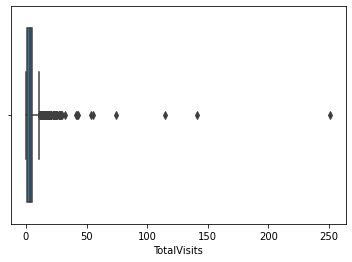

In [743]:
sns.boxplot(edu['TotalVisits'])
plt.show()

Major total visits is around 0 to 5.

In [744]:
# Capping Total Visits at 99%
q = edu['TotalVisits'].quantile(0.99)
edu['TotalVisits'][edu['TotalVisits']>=q] = q

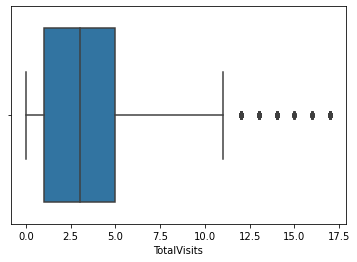

In [745]:
sns.boxplot(edu['TotalVisits'])
plt.show()

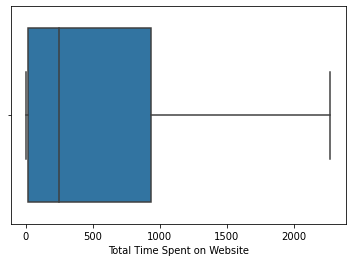

In [746]:
sns.boxplot(edu['Total Time Spent on Website'])
plt.show()

Inter-quartile range for Total Time Spent on Website is between 0 and 900 and no outliers observed.

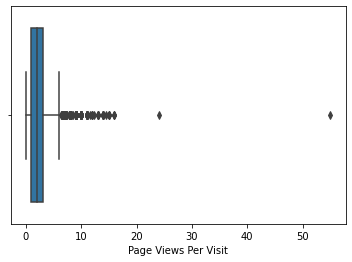

In [747]:
sns.boxplot(edu['Page Views Per Visit'])
plt.show()

Inter-quartile range for Page Views Per Visit is between 0 and 2.5

In [748]:
# Capping Page Views Per Visit' at 99%
q1 = edu['Page Views Per Visit'].quantile(0.99)
edu['Page Views Per Visit'][edu['Page Views Per Visit']>=q1] = q1

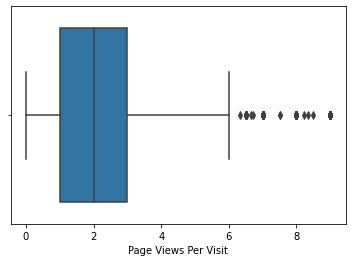

In [749]:
sns.boxplot(edu['Page Views Per Visit'])
plt.show()

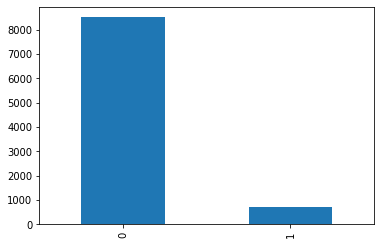

In [750]:
edu['Do Not Email'].value_counts().plot.bar()
plt.show()

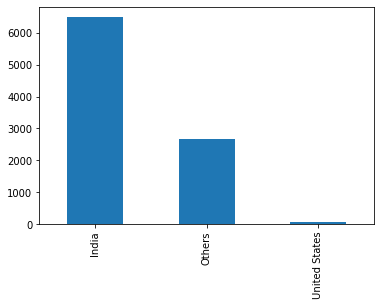

In [751]:
edu['Country'].value_counts().plot.bar()
plt.show()

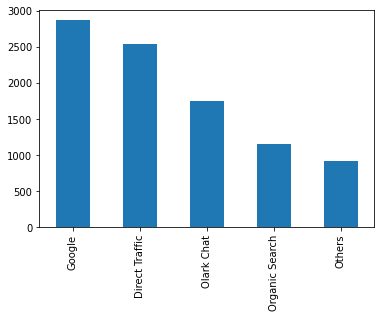

In [752]:
edu['Lead Source'].value_counts().plot.bar()
plt.show()

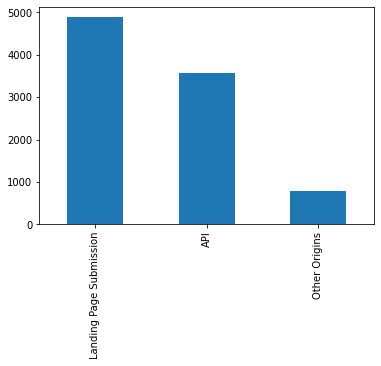

In [753]:
edu['Lead Origin'].value_counts().plot.bar()
plt.show()

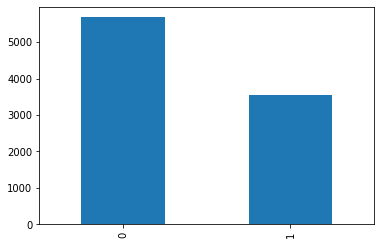

In [754]:
edu['Converted'].value_counts().plot.bar()
plt.show()

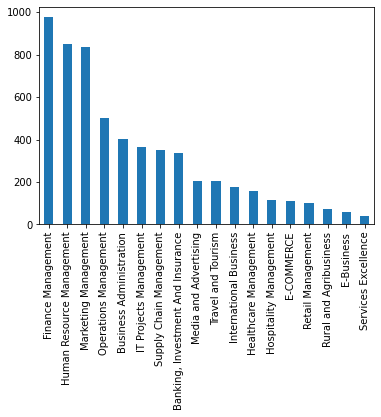

In [755]:
edu['Specialization'].value_counts().tail(-1).plot.bar()
plt.show()

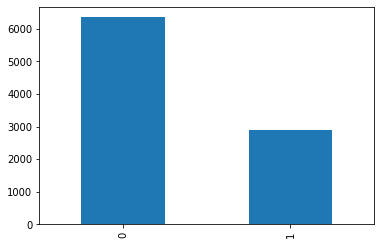

In [756]:
edu['A free copy of Mastering The Interview'].value_counts().plot.bar()
plt.show()

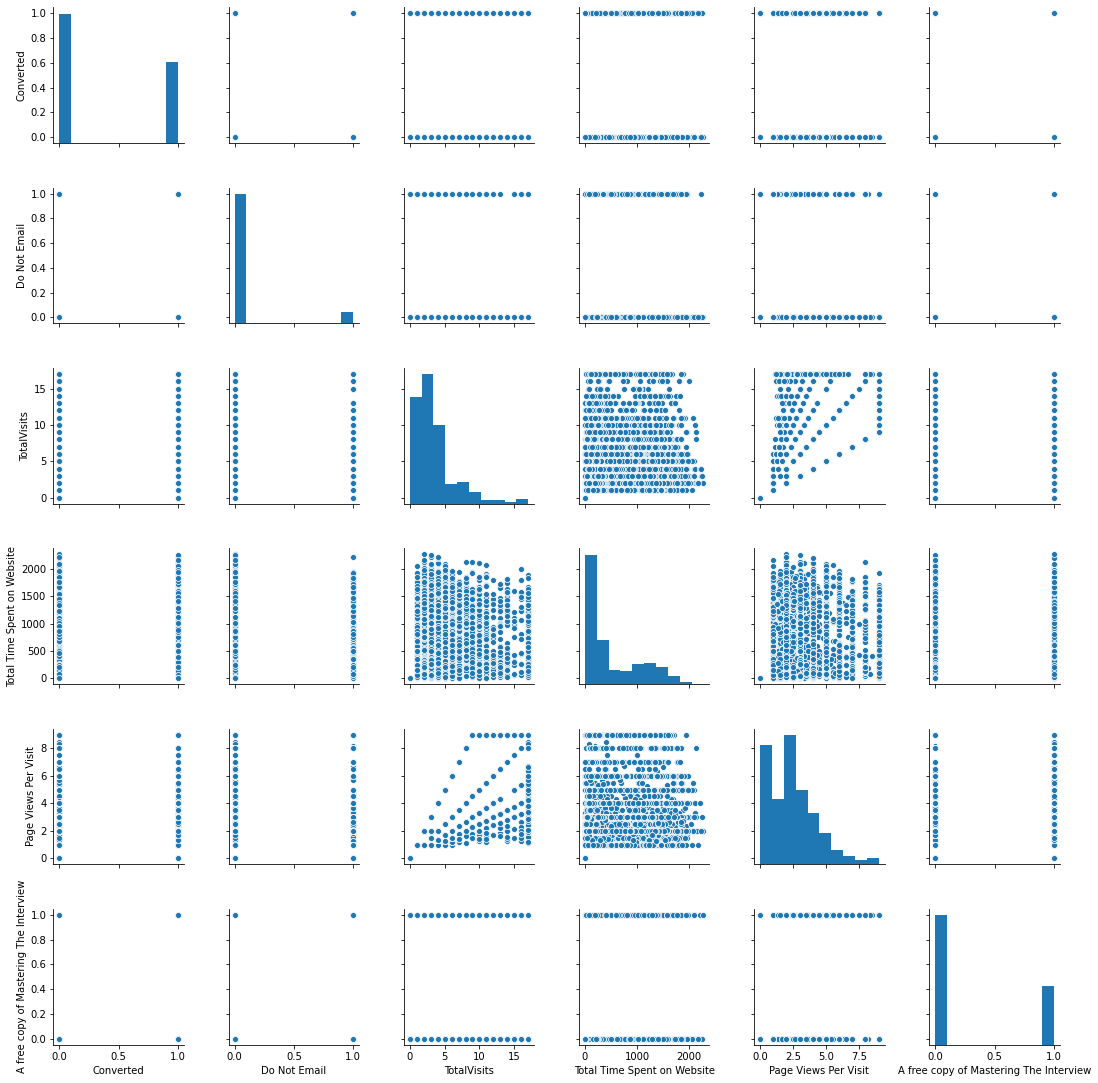

In [757]:
sns.pairplot(edu, vars = ['Converted', 'Do Not Email','TotalVisits','Total Time Spent on Website','Page Views Per Visit','A free copy of Mastering The Interview'])
plt.show()

As per the graph, there exists a minor postive correlation between Total visits and Conversion.

# Creating Dummies for Categorical variables

In [758]:
edu.head()

Lead Number              Lead Origin     Lead Source  Do Not Email  \
0       660737                      API      Olark Chat             0   
1       660728                      API  Organic Search             0   
2       660727  Landing Page Submission  Direct Traffic             0   
3       660719  Landing Page Submission  Direct Traffic             0   
4       660681  Landing Page Submission          Google             0   

   Converted  TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0          0          0.0                            0                   0.0   
1          0          5.0                          674                   2.5   
2          1          2.0                         1532                   2.0   
3          0          1.0                          305                   1.0   
4          1          2.0                         1428                   1.0   

  Country           Specialization  A free copy of Mastering The Interview  
0  Others                   Others                                       0  
1   India                   Others                                       0  
2   India  Business Administration                                       1  
3   India    Media and Advertising                                       0  
4   India                   Others                                       0

In [759]:
# Creating dummies for Lead Origin

lo = pd.get_dummies(edu['Lead Origin'], drop_first = True)

In [760]:
lo.head()

Landing Page Submission  Other Origins
0                        0              0
1                        0              0
2                        1              0
3                        1              0
4                        1              0

In [761]:
lo.head()

Landing Page Submission  Other Origins
0                        0              0
1                        0              0
2                        1              0
3                        1              0
4                        1              0

In [762]:
# Creating dummies for Lead Source, Country and Specialization
ls = pd.get_dummies(edu['Lead Source'])
co = pd.get_dummies(edu.Country)
sp = pd.get_dummies(edu.Specialization)

In [763]:
ls.head()

Direct Traffic  Google  Olark Chat  Organic Search  Others
0               0       0           1               0       0
1               0       0           0               1       0
2               1       0           0               0       0
3               1       0           0               0       0
4               0       1           0               0       0

In [764]:
sp.head()

Banking, Investment And Insurance  Business Administration  E-Business  \
0                                  0                        0           0   
1                                  0                        0           0   
2                                  0                        1           0   
3                                  0                        0           0   
4                                  0                        0           0   

   E-COMMERCE  Finance Management  Healthcare Management  \
0           0                   0                      0   
1           0                   0                      0   
2           0                   0                      0   
3           0                   0                      0   
4           0                   0                      0   

   Hospitality Management  Human Resource Management  IT Projects Management  \
0                       0                          0                       0   
1                       0                          0                       0   
2                       0                          0                       0   
3                       0                          0                       0   
4                       0                          0                       0   

   International Business  Marketing Management  Media and Advertising  \
0                       0                     0                      0   
1                       0                     0                      0   
2                       0                     0                      0   
3                       0                     0                      1   
4                       0                     0                      0   

   Operations Management  Others  Retail Management  Rural and Agribusiness  \
0                      0       1                  0                       0   
1                      0       1                  0                       0   
2                      0       0                  0                       0   
3                      0       0                  0                       0   
4                      0       1                  0                       0   

   Services Excellence  Supply Chain Management  Travel and Tourism  
0                    0                        0                   0  
1                    0                        0                   0  
2                    0                        0                   0  
3                    0                        0                   0  
4                    0                        0                   0

In [765]:
co.head()

India  Others  United States
0      0       1              0
1      1       0              0
2      1       0              0
3      1       0              0
4      1       0              0

In [766]:
#Dropping "Others" in the dummies dataframe.

ls.drop(columns ="Others", inplace = True)
co.drop(columns ="Others", inplace = True)
sp.drop(columns ="Others", inplace = True)

In [767]:
# Merging created dummies to original dataframe and removing the columns, for which dummies were merged.

edu = pd.concat([edu,lo,ls,co,sp],axis= 1)

In [768]:
edu.drop(columns = ['Lead Origin','Lead Source','Country','Specialization'],inplace = True)

In [769]:
edu.head()

Lead Number  Do Not Email  Converted  TotalVisits  \
0       660737             0          0          0.0   
1       660728             0          0          5.0   
2       660727             0          1          2.0   
3       660719             0          0          1.0   
4       660681             0          1          2.0   

   Total Time Spent on Website  Page Views Per Visit  \
0                            0                   0.0   
1                          674                   2.5   
2                         1532                   2.0   
3                          305                   1.0   
4                         1428                   1.0   

   A free copy of Mastering The Interview  Landing Page Submission  \
0                                       0                        0   
1                                       0                        0   
2                                       1                        1   
3                                       0                        1   
4                                       0                        1   

   Other Origins  Direct Traffic  Google  Olark Chat  Organic Search  India  \
0              0               0       0           1               0      0   
1              0               0       0           0               1      1   
2              0               1       0           0               0      1   
3              0               1       0           0               0      1   
4              0               0       1           0               0      1   

   United States  Banking, Investment And Insurance  Business Administration  \
0              0                                  0                        0   
1              0                                  0                        0   
2              0                                  0                        1   
3              0                                  0                        0   
4              0                                  0                        0   

   E-Business  E-COMMERCE  Finance Management  Healthcare Management  \
0           0           0                   0                      0   
1           0           0                   0                      0   
2           0           0                   0                      0   
3           0           0                   0                      0   
4           0           0                   0                      0   

   Hospitality Management  Human Resource Management  IT Projects Management  \
0                       0                          0                       0   
1                       0                          0                       0   
2                       0                          0                       0   
3                       0                          0                       0   
4                       0                          0                       0   

   International Business  Marketing Management  Media and Advertising  \
0                       0                     0                      0   
1                       0                     0                      0   
2                       0                     0                      0   
3                       0                     0                      1   
4                       0                     0                      0   

   Operations Management  Retail Management  Rural and Agribusiness  \
0                      0                  0                       0   
1                      0                  0                       0   
2                      0                  0                       0   
3                      0                  0                       0   
4                      0                  0                       0   

   Services Excellence  Supply Chain Management  Travel and Tourism  
0                    0                        0                   0  
1                    0    

# Split data as Train and Test

In [770]:
# Putting feature variable to X
X = edu.drop(['Converted','Lead Number'], axis=1)

X.head()

Do Not Email  TotalVisits  Total Time Spent on Website  \
0             0          0.0                            0   
1             0          5.0                          674   
2             0          2.0                         1532   
3             0          1.0                          305   
4             0          2.0                         1428   

   Page Views Per Visit  A free copy of Mastering The Interview  \
0                   0.0                                       0   
1                   2.5                                       0   
2                   2.0                                       1   
3                   1.0                                       0   
4                   1.0                                       0   

   Landing Page Submission  Other Origins  Direct Traffic  Google  Olark Chat  \
0                        0              0               0       0           1   
1                        0              0               0       0           0   
2                        1              0               1       0           0   
3                        1              0               1       0           0   
4                        1              0               0       1           0   

   Organic Search  India  United States  Banking, Investment And Insurance  \
0               0      0              0                                  0   
1               1      1              0                                  0   
2               0      1              0                                  0   
3               0      1              0                                  0   
4               0      1              0                                  0   

   Business Administration  E-Business  E-COMMERCE  Finance Management  \
0                        0           0           0                   0   
1                        0           0           0                   0   
2                        1           0           0                   0   
3                        0           0           0                   0   
4                        0           0           0                   0   

   Healthcare Management  Hospitality Management  Human Resource Management  \
0                      0                       0                          0   
1                      0                       0                          0   
2                      0                       0                          0   
3                      0                       0                          0   
4                      0                       0                          0   

   IT Projects Management  International Business  Marketing Management  \
0                       0                       0                     0   
1                       0                       0                     0   
2                       0                       0                     0   
3                       0                       0                     0   
4                       0                       0                     0   

   Media and Advertising  Operations Management  Retail Management  \
0                      0                      0                  0   
1                      0                      0                  0   
2                      0                      0                  0   
3                      1                      0                  0   
4                      0                      0                  0   

   Rural and Agribusiness  Services Excellence  Supply Chain Management  \
0                       0                    0                        0   
1                       0                    0                        0   
2                       0                    0                        0   
3                       0                    0                        0   
4                       0                    0                        0   

   Travel and Tourism  
0         

In [771]:
# Putting response variable to y
y = edu['Converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [772]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

# Scaling numeric Features

In [773]:
scaler = StandardScaler()

X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

Do Not Email  TotalVisits  Total Time Spent on Website  \
1871             0    -1.022595                    -0.885371   
6795             0     0.205373                     0.005716   
3516             0     0.512365                    -0.691418   
8105             0     0.512365                     1.365219   
3934             0    -1.022595                    -0.885371   

      Page Views Per Visit  A free copy of Mastering The Interview  \
1871             -1.180474                                       0   
6795             -0.503379                                       1   
3516              0.092260                                       0   
8105              1.364995                                       0   
3934             -1.180474                                       0   

      Landing Page Submission  Other Origins  Direct Traffic  Google  \
1871                        0              0               0       0   
6795                        1              0               1       0   
3516                        0              0               0       0   
8105                        1              0               0       1   
3934                        0              0               0       0   

      Olark Chat  Organic Search  India  United States  \
1871           1               0      0              0   
6795           0               0      1              0   
3516           1               0      0              0   
8105           0               0      1              0   
3934           1               0      0              0   

      Banking, Investment And Insurance  Business Administration  E-Business  \
1871                                  0                        0           0   
6795                                  0                        0           0   
3516                                  0                        0           0   
8105                                  0                        0           0   
3934                                  0                        0           0   

      E-COMMERCE  Finance Management  Healthcare Management  \
1871           0                   0                      0   
6795           0                   0                      0   
3516           0                   0                      0   
8105           0                   0                      0   
3934           0                   0                      0   

      Hospitality Management  Human Resource Management  \
1871                       0                          0   
6795                       0                          0   
3516                       0                          0   
8105                       0                          0   
3934                       0                          0   

      IT Projects Management  International Business  Marketing Management  \
1871                       0                       0                     1   
6795                       0                       0                     0   
3516                       0                       0                     0   
8105                       0                       0                     0   
3934                       0                       0                     0   

      Media and Advertising  Operations Management  Retail Management  \
1871                      0                      0                  0   
6795                      0                      0                  0   
3516                      0                      0                  0   
8105                      0                      0                  0   
3934                      0                      0                  0   

      Rural and Agribusiness  Services Excellence  Supply Chain Management  \
1871                       0                    0                        0   
6795                       0                    0                        0   
3516                       0                    0            

In [774]:
# Checking the Conversion Rate
conv = (sum(edu['Converted'])/len(edu['Converted'].index))*100
conv

38.53896103896104

Conversion rate is 38.5%

# Checking Correlation

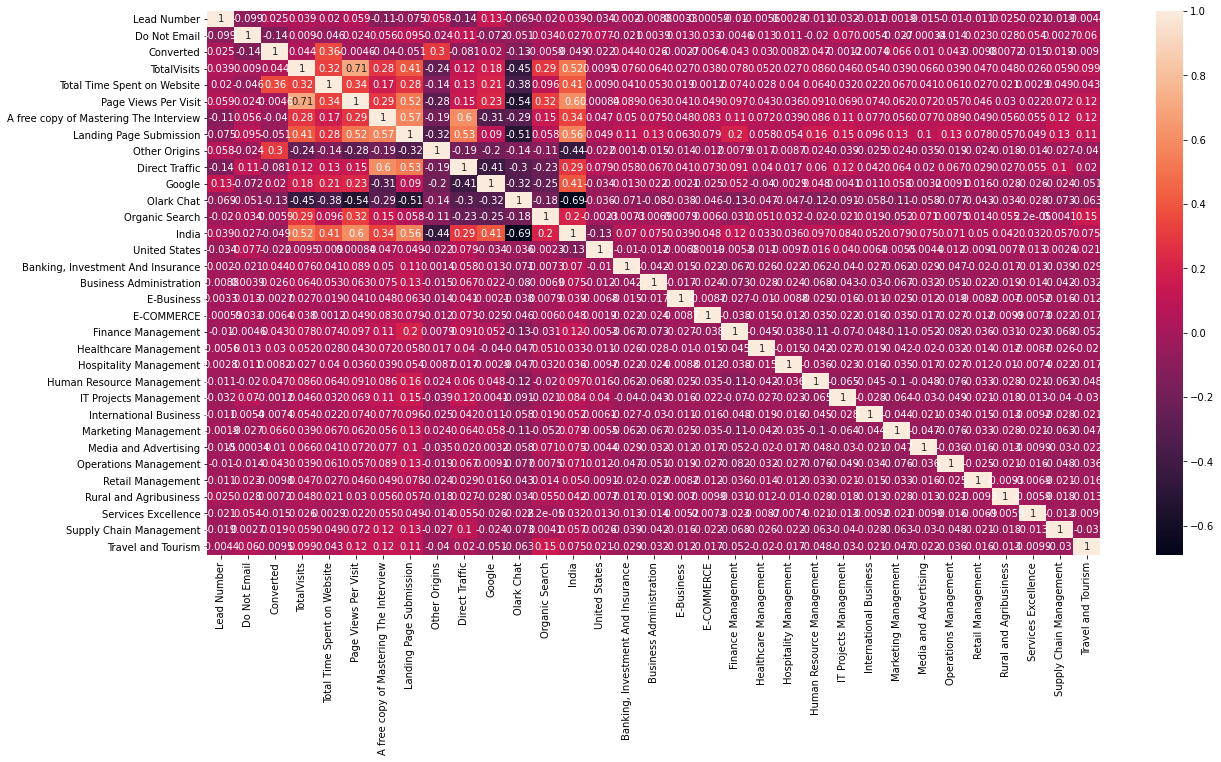

In [775]:
# correlation matrix 
plt.figure(figsize = (20,10))
sns.heatmap(edu.corr(),annot = True)
plt.show()

In [776]:
# Dropping highly correlated dummy variables

X_test = X_test.drop(['Olark Chat','India','Direct Traffic','Landing Page Submission'],1)
X_train = X_train.drop(['Olark Chat','India','Direct Traffic','Landing Page Submission'],1)

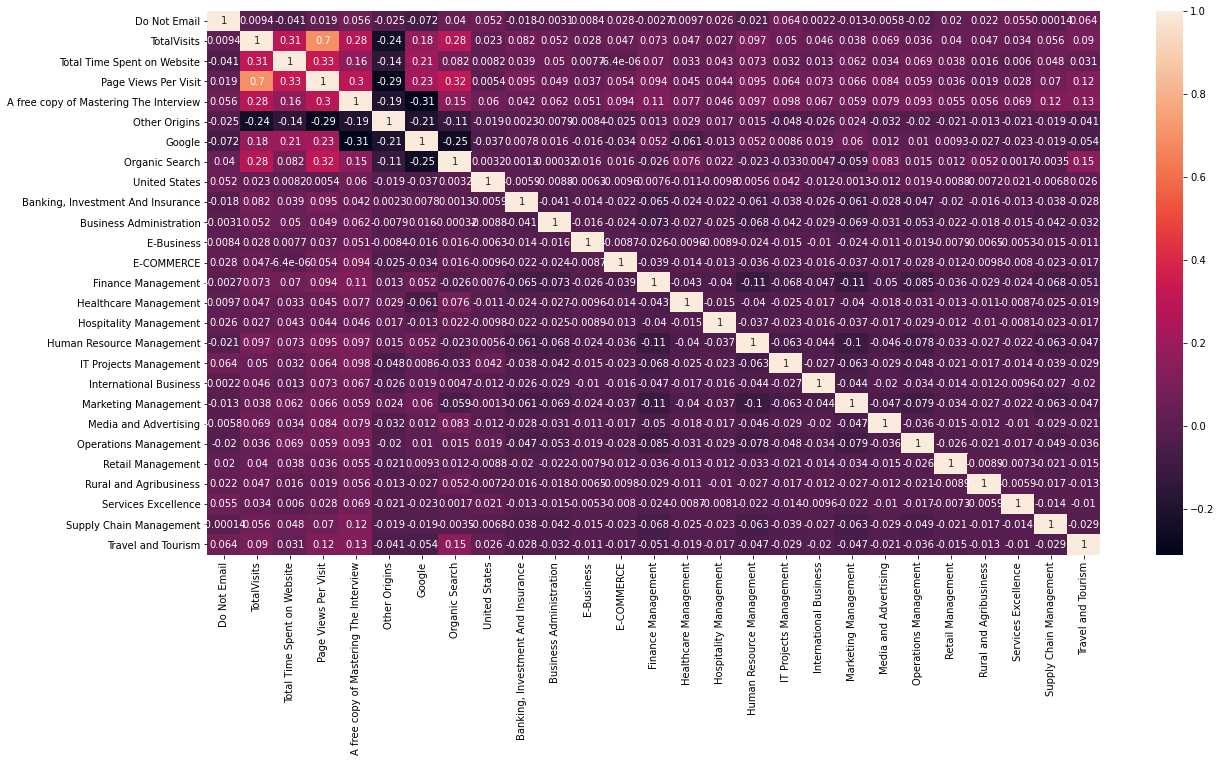

In [777]:
# After dropping highly correlated variables, checking the correlation matrix again.

plt.figure(figsize = (20,10))
sns.heatmap(X_train.corr(),annot = True)
plt.show()

# Model Building

In [778]:
import statsmodels.api as sm

In [779]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6440
Model Family:                Binomial   Df Model:                           27
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3243.9
Date:                Mon, 07 Dec 2020   Deviance:                       6487.7
Time:                        22:33:38   Pearson chi2:                 6.67e+03
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                     -0.9992      0.073    -13.681      0.000      -1.142      -0.856
Do Not Email                              -1.4142      0.146     -9.675      0.000      -1.701      -1.128
TotalVisits                                0.1334      0.042      3.206      0.001       0.052       0.215
Total Time Spent on Website                1.0090      0.035     29.063      0.000       0.941       1.077
Page Views Per Visit                      -0.2829      0.047     -6.002      0.000      -0.375      -0.191
A free copy of Mastering The Interview    -0.6324      0.088     -7.157      0.000      -0.806      -0.459
Other Origins                              3.1807      0.149     21.402      0.000       2.889       3.472
Google                                    -0.1535      0.083     -1.840      0.066      -0.317       0.010
Organic Search                             0.0592      0.107      0.554      0.579      -0.150       0.269
United States                              0.0795      0.358      0.222      0.824      -0.621       0.780
Banking, Investment And Insurance          0.9736      0.175      5.563      0.000       0.631       1.317
Business Administration                    0.6900      0.159      4.336      0.000       0.378       1.002
E-Business                                 0.4046      0.424      0.955      0.340      -0.426       1.235
E-COMMERCE                                 1.0167      0.271      3.752      0.000       0.486       1.548
Finance Management                         0.8879      0.118      7.518      0.000       0.656       1.119
Healthcare Management                      1.1224      0.256      4.387      0.000       0.621       1.624
Hospitality Management                    -0.0717      0.291     -0.247      0.805      -0.642       0.498
Human Resource Management                  0.7065      0.123      5.750      0.000       0.466       0.947
IT Projects Management                     0.9279      0.171      5.429      0.000       0.593       1.263
International Business                     0.3866      0.243      1.589      0.112      -0.090       0.863
Marketing Management                       0.7832      0.120      6.517      0.000       0.548       1.019
Media and Advertising                      0.9532      0.215      4.431      0.000       0.532       1.375
Operations Management                      0.9121      0.142      6.431      0.000       0.634       1.190
Retail Management                          0.5312      0.299      1.774      0.076      -0.056       1.118
Rural and Agribusiness                     1.2737      0.355      3.592      0.000       0.579       1.969
Services Excellence                        0.7335      0.451      1.627      0.104     

## Feature Selection using RFE

In [780]:
logreg = LogisticRegression()

In [781]:
rfe = RFE(logreg, 20)             # running RFE with 20 variables as output
rfe = rfe.fit(X_train, y_train)

In [782]:
rfe.support_

array([ True, False,  True, False,  True,  True, False, False, False,
        True,  True,  True,  True,  True,  True, False,  True,  True,
       False,  True,  True,  True,  True,  True,  True,  True,  True])

In [783]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('TotalVisits', False, 5),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 3),
 ('A free copy of Mastering The Interview', True, 1),
 ('Other Origins', True, 1),
 ('Google', False, 4),
 ('Organic Search', False, 8),
 ('United States', False, 7),
 ('Banking, Investment And Insurance', True, 1),
 ('Business Administration', True, 1),
 ('E-Business', True, 1),
 ('E-COMMERCE', True, 1),
 ('Finance Management', True, 1),
 ('Healthcare Management', True, 1),
 ('Hospitality Management', False, 6),
 ('Human Resource Management', True, 1),
 ('IT Projects Management', True, 1),
 ('International Business', False, 2),
 ('Marketing Management', True, 1),
 ('Media and Advertising', True, 1),
 ('Operations Management', True, 1),
 ('Retail Management', True, 1),
 ('Rural and Agribusiness', True, 1),
 ('Services Excellence', True, 1),
 ('Supply Chain Management', True, 1),
 ('Travel and Tourism', True, 1)]

In [784]:
col = X_train.columns[rfe.support_]

In [785]:
X_train.columns[~rfe.support_]

Index(['TotalVisits', 'Page Views Per Visit', 'Google', 'Organic Search',
       'United States', 'Hospitality Management', 'International Business'],
      dtype='object')

#### Assessing the model with StatsModels

In [786]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6447
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3267.7
Date:                Mon, 07 Dec 2020   Deviance:                       6535.5
Time:                        22:33:40   Pearson chi2:                 6.75e+03
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                     -0.9827      0.054    -18.286      0.000      -1.088      -0.877
Do Not Email                              -1.3887      0.145     -9.569      0.000      -1.673      -1.104
Total Time Spent on Website                0.9637      0.033     29.556      0.000       0.900       1.028
A free copy of Mastering The Interview    -0.5246      0.074     -7.060      0.000      -0.670      -0.379
Other Origins                              3.3750      0.142     23.724      0.000       3.096       3.654
Banking, Investment And Insurance          0.7684      0.167      4.609      0.000       0.442       1.095
Business Administration                    0.5418      0.153      3.540      0.000       0.242       0.842
E-Business                                 0.1939      0.424      0.457      0.647      -0.637       1.025
E-COMMERCE                                 0.8211      0.264      3.107      0.002       0.303       1.339
Finance Management                         0.7048      0.110      6.432      0.000       0.490       0.920
Healthcare Management                      0.9650      0.247      3.903      0.000       0.480       1.450
Human Resource Management                  0.5360      0.115      4.677      0.000       0.311       0.761
IT Projects Management                     0.7501      0.164      4.562      0.000       0.428       1.072
Marketing Management                       0.6087      0.113      5.407      0.000       0.388       0.829
Media and Advertising                      0.7468      0.209      3.581      0.000       0.338       1.156
Operations Management                      0.7516      0.136      5.540      0.000       0.486       1.017
Retail Management                          0.3666      0.295      1.242      0.214      -0.212       0.945
Rural and Agribusiness                     1.1860      0.350      3.391      0.001       0.501       1.871
Services Excellence                        0.5701      0.450      1.266      0.205      -0.312       1.452
Supply Chain Management                    0.6224      0.165      3.777      0.000       0.299       0.945
Travel and Tourism                         0.6101      0.216      2.826      0.005       0.187       1.033
==========================================================================================================
"""

In [787]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

1871    0.226662
6795    0.182157
3516    0.161238
8105    0.711574
3934    0.137530
4844    0.794836
3297    0.264122
8071    0.935965
987     0.401589
7423    0.715066
dtype: float64

In [788]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.22666235, 0.18215713, 0.16123781, 0.71157358, 0.13752987,
       0.79483557, 0.26412217, 0.93596512, 0.40158894, 0.7150663 ])

##### Creating a dataframe with the actual conversion flag and the predicted probabilities

In [789]:
y_train_pred_final = pd.DataFrame({'Conv':y_train.values, 'Conv_Prob':y_train_pred})
y_train_pred_final['Lead Number'] = y_train.index
y_train_pred_final.head()

Conv  Conv_Prob  Lead Number
0     0   0.226662         1871
1     0   0.182157         6795
2     0   0.161238         3516
3     0   0.711574         8105
4     0   0.137530         3934

In [790]:
##### Creating new column 'predicted' with 1 if Conv_Prob > 0.5 else 0

y_train_pred_final['predicted'] = y_train_pred_final.Conv_Prob.map(lambda x: 1 if x > 0.5 else 0)


y_train_pred_final.head()

Conv  Conv_Prob  Lead Number  predicted
0     0   0.226662         1871          0
1     0   0.182157         6795          0
2     0   0.161238         3516          0
3     0   0.711574         8105          1
4     0   0.137530         3934          0

In [791]:
from sklearn import metrics

In [792]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Conv, y_train_pred_final.predicted )
print(confusion)

[[3483  519]
 [ 920 1546]]


In [793]:
# Predicted     not_churn    churn
# Actual
# not_churn        3270      365
# churn            579       708

In [794]:
# Checking the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Conv, y_train_pred_final.predicted))

0.7775200989486704


#### Checking VIFs

In [795]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [796]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
2   A free copy of Mastering The Interview  1.97
8                       Finance Management  1.18
10               Human Resource Management  1.15
12                    Marketing Management  1.13
3                            Other Origins  1.11
14                   Operations Management  1.10
18                 Supply Chain Management  1.09
11                  IT Projects Management  1.08
0                             Do Not Email  1.08
19                      Travel and Tourism  1.08
1              Total Time Spent on Website  1.07
5                  Business Administration  1.07
9                    Healthcare Management  1.05
4        Banking, Investment And Insurance  1.05
7                               E-COMMERCE  1.04
13                   Media and Advertising  1.04
15                       Retail Management  1.03
6                               E-Business  1.02
16                  Rural and Agribusiness  1.02
17                     Services Excellence  1.02

In [797]:
# Dropping "E-Business" considering p > 0.05

col = col.drop('E-Business', 1)

In [798]:
# Re-running the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6448
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3267.8
Date:                Mon, 07 Dec 2020   Deviance:                       6535.7
Time:                        22:34:03   Pearson chi2:                 6.75e+03
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                     -0.9799      0.053    -18.362      0.000      -1.085      -0.875
Do Not Email                              -1.3891      0.145     -9.571      0.000      -1.674      -1.105
Total Time Spent on Website                0.9642      0.033     29.587      0.000       0.900       1.028
A free copy of Mastering The Interview    -0.5218      0.074     -7.045      0.000      -0.667      -0.377
Other Origins                              3.3752      0.142     23.728      0.000       3.096       3.654
Banking, Investment And Insurance          0.7643      0.166      4.591      0.000       0.438       1.091
Business Administration                    0.5376      0.153      3.519      0.000       0.238       0.837
E-COMMERCE                                 0.8164      0.264      3.091      0.002       0.299       1.334
Finance Management                         0.7006      0.109      6.417      0.000       0.487       0.915
Healthcare Management                      0.9602      0.247      3.887      0.000       0.476       1.444
Human Resource Management                  0.5318      0.114      4.656      0.000       0.308       0.756
IT Projects Management                     0.7458      0.164      4.544      0.000       0.424       1.067
Marketing Management                       0.6047      0.112      5.388      0.000       0.385       0.825
Media and Advertising                      0.7424      0.208      3.563      0.000       0.334       1.151
Operations Management                      0.7472      0.135      5.521      0.000       0.482       1.012
Retail Management                          0.3621      0.295      1.227      0.220      -0.216       0.940
Rural and Agribusiness                     1.1814      0.350      3.379      0.001       0.496       1.867
Services Excellence                        0.5653      0.450      1.256      0.209      -0.317       1.447
Supply Chain Management                    0.6178      0.165      3.755      0.000       0.295       0.940
Travel and Tourism                         0.6052      0.216      2.806      0.005       0.183       1.028
==========================================================================================================
"""

In [799]:
# Dropping "Retail Management" considering p > 0.05

col = col.drop('Retail Management', 1)

In [800]:
# Re-running the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6449
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3268.6
Date:                Mon, 07 Dec 2020   Deviance:                       6537.1
Time:                        22:34:12   Pearson chi2:                 6.74e+03
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                     -0.9695      0.053    -18.434      0.000      -1.073      -0.866
Do Not Email                              -1.3868      0.145     -9.556      0.000      -1.671      -1.102
Total Time Spent on Website                0.9665      0.033     29.704      0.000       0.903       1.030
A free copy of Mastering The Interview    -0.5120      0.074     -6.950      0.000      -0.656      -0.368
Other Origins                              3.3736      0.142     23.729      0.000       3.095       3.652
Banking, Investment And Insurance          0.7491      0.166      4.512      0.000       0.424       1.074
Business Administration                    0.5219      0.152      3.429      0.001       0.224       0.820
E-COMMERCE                                 0.7990      0.264      3.030      0.002       0.282       1.316
Finance Management                         0.6850      0.108      6.319      0.000       0.473       0.898
Healthcare Management                      0.9425      0.247      3.823      0.000       0.459       1.426
Human Resource Management                  0.5161      0.113      4.548      0.000       0.294       0.738
IT Projects Management                     0.7295      0.164      4.459      0.000       0.409       1.050
Marketing Management                       0.5897      0.112      5.287      0.000       0.371       0.808
Media and Advertising                      0.7258      0.208      3.491      0.000       0.318       1.133
Operations Management                      0.7312      0.135      5.428      0.000       0.467       0.995
Rural and Agribusiness                     1.1642      0.349      3.333      0.001       0.480       1.849
Services Excellence                        0.5469      0.450      1.216      0.224      -0.335       1.429
Supply Chain Management                    0.6008      0.164      3.665      0.000       0.279       0.922
Travel and Tourism                         0.5867      0.215      2.727      0.006       0.165       1.008
==========================================================================================================
"""

In [801]:
# Dropping "Services Excellence" considering p > 0.05

col = col.drop('Services Excellence', 1)

In [802]:
# Re-running the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6450
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3269.3
Date:                Mon, 07 Dec 2020   Deviance:                       6538.5
Time:                        22:34:17   Pearson chi2:                 6.74e+03
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                     -0.9636      0.052    -18.421      0.000      -1.066      -0.861
Do Not Email                              -1.3803      0.145     -9.520      0.000      -1.664      -1.096
Total Time Spent on Website                0.9673      0.033     29.728      0.000       0.904       1.031
A free copy of Mastering The Interview    -0.5043      0.073     -6.870      0.000      -0.648      -0.360
Other Origins                              3.3715      0.142     23.727      0.000       3.093       3.650
Banking, Investment And Insurance          0.7396      0.166      4.461      0.000       0.415       1.065
Business Administration                    0.5121      0.152      3.370      0.001       0.214       0.810
E-COMMERCE                                 0.7873      0.264      2.988      0.003       0.271       1.304
Finance Management                         0.6752      0.108      6.248      0.000       0.463       0.887
Healthcare Management                      0.9309      0.246      3.780      0.000       0.448       1.414
Human Resource Management                  0.5063      0.113      4.474      0.000       0.285       0.728
IT Projects Management                     0.7189      0.163      4.402      0.000       0.399       1.039
Marketing Management                       0.5805      0.111      5.218      0.000       0.362       0.798
Media and Advertising                      0.7152      0.208      3.443      0.001       0.308       1.122
Operations Management                      0.7211      0.134      5.364      0.000       0.458       0.985
Rural and Agribusiness                     1.1527      0.349      3.302      0.001       0.469       1.837
Supply Chain Management                    0.5899      0.164      3.604      0.000       0.269       0.911
Travel and Tourism                         0.5743      0.215      2.673      0.008       0.153       0.995
==========================================================================================================
"""

In [803]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
2   A free copy of Mastering The Interview  1.87
7                       Finance Management  1.17
9                Human Resource Management  1.15
11                    Marketing Management  1.12
3                            Other Origins  1.11
13                   Operations Management  1.10
15                 Supply Chain Management  1.09
16                      Travel and Tourism  1.08
10                  IT Projects Management  1.08
0                             Do Not Email  1.07
1              Total Time Spent on Website  1.07
5                  Business Administration  1.06
4        Banking, Investment And Insurance  1.05
6                               E-COMMERCE  1.04
12                   Media and Advertising  1.04
8                    Healthcare Management  1.04
14                  Rural and Agribusiness  1.02

In [804]:
# Though p < 0.05 and vif < 2, further Dropping "Human Resource Management" considering lower absolute value of co-efficient

col = col.drop('Human Resource Management', 1)

In [805]:
# Re-running the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6451
Model Family:                Binomial   Df Model:                           16
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3279.2
Date:                Mon, 07 Dec 2020   Deviance:                       6558.4
Time:                        22:34:45   Pearson chi2:                 6.73e+03
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                     -0.8707      0.047    -18.400      0.000      -0.963      -0.778
Do Not Email                              -1.3943      0.145     -9.591      0.000      -1.679      -1.109
Total Time Spent on Website                0.9854      0.032     30.449      0.000       0.922       1.049
A free copy of Mastering The Interview    -0.4319      0.072     -6.013      0.000      -0.573      -0.291
Other Origins                              3.3907      0.142     23.942      0.000       3.113       3.668
Banking, Investment And Insurance          0.6109      0.163      3.737      0.000       0.291       0.931
Business Administration                    0.3805      0.149      2.550      0.011       0.088       0.673
E-COMMERCE                                 0.6448      0.262      2.463      0.014       0.132       1.158
Finance Management                         0.5441      0.104      5.233      0.000       0.340       0.748
Healthcare Management                      0.7848      0.244      3.217      0.001       0.307       1.263
IT Projects Management                     0.5852      0.161      3.642      0.000       0.270       0.900
Marketing Management                       0.4536      0.108      4.219      0.000       0.243       0.664
Media and Advertising                      0.5781      0.206      2.810      0.005       0.175       0.981
Operations Management                      0.5867      0.131      4.471      0.000       0.329       0.844
Rural and Agribusiness                     1.0125      0.348      2.909      0.004       0.330       1.695
Supply Chain Management                    0.4488      0.161      2.790      0.005       0.133       0.764
Travel and Tourism                         0.4253      0.213      2.000      0.046       0.008       0.842
==========================================================================================================
"""

In [806]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
2   A free copy of Mastering The Interview  1.67
7                       Finance Management  1.15
10                    Marketing Management  1.11
3                            Other Origins  1.08
12                   Operations Management  1.08
14                 Supply Chain Management  1.08
0                             Do Not Email  1.07
9                   IT Projects Management  1.07
15                      Travel and Tourism  1.07
1              Total Time Spent on Website  1.06
5                  Business Administration  1.06
4        Banking, Investment And Insurance  1.04
6                               E-COMMERCE  1.04
8                    Healthcare Management  1.04
11                   Media and Advertising  1.04
13                  Rural and Agribusiness  1.02

In [807]:
# Though p < 0.05 and vif < 2, further Dropping "Business Administration" considering lower absolute value of co-efficient

col = col.drop('Business Administration', 1)

In [808]:
# Re-running the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6452
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3282.4
Date:                Mon, 07 Dec 2020   Deviance:                       6564.8
Time:                        22:35:10   Pearson chi2:                 6.74e+03
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                     -0.8414      0.046    -18.405      0.000      -0.931      -0.752
Do Not Email                              -1.3931      0.145     -9.575      0.000      -1.678      -1.108
Total Time Spent on Website                0.9907      0.032     30.664      0.000       0.927       1.054
A free copy of Mastering The Interview    -0.4087      0.071     -5.734      0.000      -0.548      -0.269
Other Origins                              3.3923      0.141     23.980      0.000       3.115       3.670
Banking, Investment And Insurance          0.5702      0.163      3.504      0.000       0.251       0.889
E-COMMERCE                                 0.5992      0.261      2.293      0.022       0.087       1.111
Finance Management                         0.5026      0.103      4.896      0.000       0.301       0.704
Healthcare Management                      0.7385      0.243      3.036      0.002       0.262       1.215
IT Projects Management                     0.5424      0.160      3.394      0.001       0.229       0.856
Marketing Management                       0.4136      0.106      3.889      0.000       0.205       0.622
Media and Advertising                      0.5345      0.205      2.606      0.009       0.132       0.936
Operations Management                      0.5441      0.130      4.179      0.000       0.289       0.799
Rural and Agribusiness                     0.9676      0.348      2.784      0.005       0.286       1.649
Supply Chain Management                    0.4040      0.160      2.525      0.012       0.090       0.718
Travel and Tourism                         0.3775      0.212      1.781      0.075      -0.038       0.793
==========================================================================================================
"""

In [809]:
# Dropping "Travel and Tourism" considering p > 0.05

col = col.drop('Travel and Tourism', 1)

In [810]:
# Re-running the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6453
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3283.9
Date:                Mon, 07 Dec 2020   Deviance:                       6567.9
Time:                        22:35:19   Pearson chi2:                 6.74e+03
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                     -0.8307      0.045    -18.362      0.000      -0.919      -0.742
Do Not Email                              -1.3799      0.145     -9.496      0.000      -1.665      -1.095
Total Time Spent on Website                0.9921      0.032     30.714      0.000       0.929       1.055
A free copy of Mastering The Interview    -0.3883      0.070     -5.523      0.000      -0.526      -0.250
Other Origins                              3.3873      0.141     23.967      0.000       3.110       3.664
Banking, Investment And Insurance          0.5501      0.162      3.391      0.001       0.232       0.868
E-COMMERCE                                 0.5732      0.261      2.198      0.028       0.062       1.084
Finance Management                         0.4816      0.102      4.727      0.000       0.282       0.681
Healthcare Management                      0.7133      0.243      2.940      0.003       0.238       1.189
IT Projects Management                     0.5196      0.159      3.264      0.001       0.208       0.832
Marketing Management                       0.3942      0.106      3.728      0.000       0.187       0.601
Media and Advertising                      0.5115      0.205      2.500      0.012       0.110       0.913
Operations Management                      0.5226      0.130      4.032      0.000       0.269       0.777
Rural and Agribusiness                     0.9424      0.347      2.716      0.007       0.262       1.623
Supply Chain Management                    0.3804      0.159      2.387      0.017       0.068       0.693
==========================================================================================================
"""

In [811]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
2   A free copy of Mastering The Interview  1.52
6                       Finance Management  1.13
9                     Marketing Management  1.10
11                   Operations Management  1.08
3                            Other Origins  1.07
13                 Supply Chain Management  1.07
0                             Do Not Email  1.06
1              Total Time Spent on Website  1.06
8                   IT Projects Management  1.06
4        Banking, Investment And Insurance  1.04
5                               E-COMMERCE  1.03
7                    Healthcare Management  1.03
10                   Media and Advertising  1.03
12                  Rural and Agribusiness  1.02

In [812]:
# Though p < 0.05 and vif < 2, further Dropping "Supply Chain Management" considering lower absolute value of co-efficient

col = col.drop('Supply Chain Management', 1)

In [813]:
# Re-running the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6454
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3286.7
Date:                Mon, 07 Dec 2020   Deviance:                       6573.5
Time:                        22:35:42   Pearson chi2:                 6.74e+03
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                     -0.8108      0.044    -18.281      0.000      -0.898      -0.724
Do Not Email                              -1.3807      0.145     -9.498      0.000      -1.666      -1.096
Total Time Spent on Website                0.9955      0.032     30.850      0.000       0.932       1.059
A free copy of Mastering The Interview    -0.3624      0.069     -5.221      0.000      -0.499      -0.226
Other Origins                              3.3879      0.141     23.990      0.000       3.111       3.665
Banking, Investment And Insurance          0.5181      0.162      3.205      0.001       0.201       0.835
E-COMMERCE                                 0.5353      0.260      2.056      0.040       0.025       1.045
Finance Management                         0.4488      0.101      4.448      0.000       0.251       0.647
Healthcare Management                      0.6755      0.242      2.792      0.005       0.201       1.150
IT Projects Management                     0.4855      0.159      3.062      0.002       0.175       0.796
Marketing Management                       0.3631      0.105      3.463      0.001       0.158       0.569
Media and Advertising                      0.4764      0.204      2.334      0.020       0.076       0.876
Operations Management                      0.4888      0.129      3.794      0.000       0.236       0.741
Rural and Agribusiness                     0.9057      0.347      2.613      0.009       0.226       1.585
==========================================================================================================
"""

In [814]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
2   A free copy of Mastering The Interview  1.44
6                       Finance Management  1.13
9                     Marketing Management  1.09
3                            Other Origins  1.07
11                   Operations Management  1.07
0                             Do Not Email  1.06
8                   IT Projects Management  1.06
1              Total Time Spent on Website  1.05
4        Banking, Investment And Insurance  1.03
5                               E-COMMERCE  1.03
7                    Healthcare Management  1.03
10                   Media and Advertising  1.03
12                  Rural and Agribusiness  1.01

In [815]:
# Dropping "A free copy of Mastering The Interview" considering low absolute co-efficient value

col = col.drop('A free copy of Mastering The Interview', 1)

In [816]:
# Re-running the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6455
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3300.6
Date:                Mon, 07 Dec 2020   Deviance:                       6601.2
Time:                        22:36:04   Pearson chi2:                 6.76e+03
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                                -0.8971      0.041    -21.637      0.000      -0.978      -0.816
Do Not Email                         -1.3967      0.145     -9.662      0.000      -1.680      -1.113
Total Time Spent on Website           0.9764      0.032     30.649      0.000       0.914       1.039
Other Origins                         3.4803      0.140     24.818      0.000       3.205       3.755
Banking, Investment And Insurance     0.4448      0.160      2.779      0.005       0.131       0.758
E-COMMERCE                            0.3655      0.257      1.423      0.155      -0.138       0.869
Finance Management                    0.3637      0.099      3.681      0.000       0.170       0.557
Healthcare Management                 0.5266      0.237      2.222      0.026       0.062       0.991
IT Projects Management                0.3852      0.156      2.468      0.014       0.079       0.691
Marketing Management                  0.3055      0.104      2.949      0.003       0.102       0.509
Media and Advertising                 0.3651      0.202      1.811      0.070      -0.030       0.760
Operations Management                 0.3972      0.127      3.120      0.002       0.148       0.647
Rural and Agribusiness                0.7623      0.342      2.230      0.026       0.092       1.432
=====================================================================================================
"""

In [817]:
# Dropping "E-COMMERCE" considering p > 0.05

col = col.drop('E-COMMERCE', 1)

In [818]:
# Re-running the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6456
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3301.6
Date:                Mon, 07 Dec 2020   Deviance:                       6603.1
Time:                        22:36:10   Pearson chi2:                 6.76e+03
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                                -0.8884      0.041    -21.696      0.000      -0.969      -0.808
Do Not Email                         -1.3938      0.145     -9.641      0.000      -1.677      -1.110
Total Time Spent on Website           0.9761      0.032     30.652      0.000       0.914       1.039
Other Origins                         3.4742      0.140     24.796      0.000       3.200       3.749
Banking, Investment And Insurance     0.4363      0.160      2.729      0.006       0.123       0.750
Finance Management                    0.3552      0.099      3.603      0.000       0.162       0.548
Healthcare Management                 0.5182      0.237      2.187      0.029       0.054       0.983
IT Projects Management                0.3764      0.156      2.414      0.016       0.071       0.682
Marketing Management                  0.2971      0.103      2.873      0.004       0.094       0.500
Media and Advertising                 0.3565      0.202      1.769      0.077      -0.038       0.751
Operations Management                 0.3887      0.127      3.057      0.002       0.140       0.638
Rural and Agribusiness                0.7535      0.342      2.205      0.027       0.084       1.423
=====================================================================================================
"""

In [819]:
# Dropping "Media and Advertising" considering p > 0.05

col = col.drop('Media and Advertising', 1)

In [820]:
# Re-running the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6457
Model Family:                Binomial   Df Model:                           10
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3303.1
Date:                Mon, 07 Dec 2020   Deviance:                       6606.2
Time:                        22:36:50   Pearson chi2:                 6.76e+03
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                                -0.8749      0.040    -21.788      0.000      -0.954      -0.796
Do Not Email                         -1.3928      0.145     -9.636      0.000      -1.676      -1.109
Total Time Spent on Website           0.9780      0.032     30.729      0.000       0.916       1.040
Other Origins                         3.4681      0.140     24.770      0.000       3.194       3.743
Banking, Investment And Insurance     0.4227      0.160      2.646      0.008       0.110       0.736
Finance Management                    0.3415      0.098      3.475      0.001       0.149       0.534
Healthcare Management                 0.5045      0.237      2.131      0.033       0.040       0.969
IT Projects Management                0.3624      0.156      2.327      0.020       0.057       0.668
Marketing Management                  0.2834      0.103      2.749      0.006       0.081       0.485
Operations Management                 0.3748      0.127      2.953      0.003       0.126       0.624
Rural and Agribusiness                0.7398      0.342      2.165      0.030       0.070       1.409
=====================================================================================================
"""

In [821]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
2                      Other Origins  1.06
1        Total Time Spent on Website  1.05
0                       Do Not Email  1.04
4                 Finance Management  1.03
6             IT Projects Management  1.02
7               Marketing Management  1.02
3  Banking, Investment And Insurance  1.01
5              Healthcare Management  1.01
8              Operations Management  1.01
9             Rural and Agribusiness  1.00

In [822]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)
y_train_pred[:10]

array([0.1888479 , 0.29538877, 0.17491538, 0.61308622, 0.14920132,
       0.72052541, 0.29963996, 0.91193401, 0.4298724 , 0.74197013])

In [823]:
y_train_pred_final['Conv_Prob'] = y_train_pred

In [824]:
# Creating column 'predicted' with 1 if Conv_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Conv_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

Conv  Conv_Prob  Lead Number  predicted
0     0   0.188848         1871          0
1     0   0.295389         6795          0
2     0   0.174915         3516          0
3     0   0.613086         8105          1
4     0   0.149201         3934          0

In [825]:
# Checking the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Conv, y_train_pred_final.predicted))

0.7773654916512059


Considering that all p-value is less than 0.05, VIF less than 2 and accuracy around 77.7% and no significant drop in accuracy, we propose not to drop any further columns.

## Metrics beyond accuracy

In [826]:
confusion = metrics.confusion_matrix(y_train_pred_final.Conv, y_train_pred_final.predicted )
confusion

array([[3477,  525],
       [ 915, 1551]])

In [827]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [828]:
# sensitivity of our logistic regression model
TP / float(TP+FN)

0.6289537712895377

In [829]:
# specificity
TN / float(TN+FP)

0.868815592203898

In [830]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.13118440779610194


In [831]:
# positive predictive value 
print (TP / float(TP+FP))

0.7471098265895953


In [832]:
# Negative predictive value
print (TN / float(TN+ FN))

0.7916666666666666


## Plotting the ROC Curve

In [833]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [834]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Conv, y_train_pred_final.Conv_Prob, drop_intermediate = False )

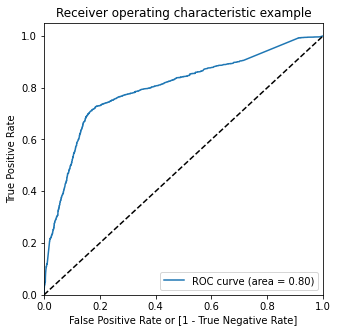

In [835]:
draw_roc(y_train_pred_final.Conv, y_train_pred_final.Conv_Prob)

## Finding Optimal Cutoff Point

Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [836]:
# creating columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conv_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

Conv  Conv_Prob  Lead Number  predicted  0.0  0.1  0.2  0.3  0.4  0.5  0.6  \
0     0   0.188848         1871          0    1    1    0    0    0    0    0   
1     0   0.295389         6795          0    1    1    1    0    0    0    0   
2     0   0.174915         3516          0    1    1    0    0    0    0    0   
3     0   0.613086         8105          1    1    1    1    1    1    1    1   
4     0   0.149201         3934          0    1    1    0    0    0    0    0   

   0.7  0.8  0.9  
0    0    0    0  
1    0    0    0  
2    0    0    0  
3    0    0    0  
4    0    0    0

In [837]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Conv, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.381262  1.000000  0.000000
0.1   0.1  0.426252  0.993512  0.076712
0.2   0.2  0.614255  0.854826  0.466017
0.3   0.3  0.754947  0.751014  0.757371
0.4   0.4  0.787415  0.699513  0.841579
0.5   0.5  0.777365  0.628954  0.868816
0.6   0.6  0.751855  0.508921  0.901549
0.7   0.7  0.722789  0.371452  0.939280
0.8   0.8  0.691249  0.239659  0.969515
0.9   0.9  0.635127  0.049473  0.996002


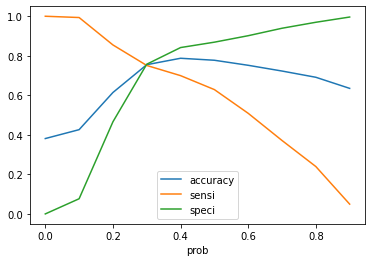

In [838]:
# plotting accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

#### From the curve above, around 0.3 is the optimum point to take it as a cutoff probability.

In [839]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conv_Prob.map( lambda x: 1 if x > 0.3 else 0)

y_train_pred_final.head()

Conv  Conv_Prob  Lead Number  predicted  0.0  0.1  0.2  0.3  0.4  0.5  0.6  \
0     0   0.188848         1871          0    1    1    0    0    0    0    0   
1     0   0.295389         6795          0    1    1    1    0    0    0    0   
2     0   0.174915         3516          0    1    1    0    0    0    0    0   
3     0   0.613086         8105          1    1    1    1    1    1    1    1   
4     0   0.149201         3934          0    1    1    0    0    0    0    0   

   0.7  0.8  0.9  final_predicted  
0    0    0    0                0  
1    0    0    0                0  
2    0    0    0                0  
3    0    0    0                1  
4    0    0    0                0

In [840]:
# checking the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Conv, y_train_pred_final.final_predicted)

0.7549474335188621

In [841]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Conv, y_train_pred_final.final_predicted )
confusion2

array([[3031,  971],
       [ 614, 1852]])

In [842]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [843]:
# Sensitivity of our logistic regression model
TP / float(TP+FN)

0.7510137875101379

In [844]:
# Specificity
TN / float(TN+FP)

0.7573713143428286

In [845]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.2426286856571714


In [846]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8315500685871057


## Precision and Recall

In [847]:
confusion = metrics.confusion_matrix(y_train_pred_final.Conv, y_train_pred_final.predicted )
confusion

array([[3477,  525],
       [ 915, 1551]])

##### Precision
TP / TP + FP

In [848]:
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.7471098265895953

##### Recall
TP / TP + FN

In [849]:
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.6289537712895377

Using sklearn utilities for the same

In [850]:
from sklearn.metrics import precision_score, recall_score

In [851]:
precision_score(y_train_pred_final.Conv, y_train_pred_final.predicted)

0.7471098265895953

In [852]:
recall_score(y_train_pred_final.Conv, y_train_pred_final.predicted)

0.6289537712895377

### Precision and recall tradeoff

In [853]:
from sklearn.metrics import precision_recall_curve

In [854]:
y_train_pred_final.Conv, y_train_pred_final.predicted

(0       0
 1       0
 2       0
 3       0
 4       0
 5       1
 6       0
 7       1
 8       0
 9       1
 10      1
 11      0
 12      1
 13      1
 14      0
 15      0
 16      0
 17      0
 18      0
 19      1
 20      1
 21      1
 22      1
 23      1
 24      1
 25      1
 26      0
 27      1
 28      1
 29      0
 30      1
 31      0
 32      1
 33      0
 34      1
 35      0
 36      0
 37      0
 38      0
 39      0
 40      0
 41      0
 42      0
 43      0
 44      0
 45      0
 46      1
 47      0
 48      0
 49      1
 50      0
 51      1
 52      1
 53      1
 54      1
 55      0
 56      1
 57      0
 58      1
 59      0
 60      0
 61      0
 62      1
 63      0
 64      1
 65      0
 66      1
 67      1
 68      0
 69      1
 70      1
 71      0
 72      1
 73      0
 74      0
 75      0
 76      1
 77      0
 78      0
 79      0
 80      0
 81      0
 82      0
 83      0
 84      0
 85      0
 86      0
 87      0
 88      1
 89      1
 90      1

In [855]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Conv, y_train_pred_final.Conv_Prob)

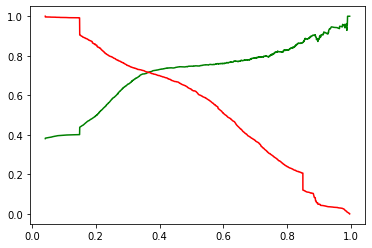

In [856]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

# Making predictions on the test set

In [857]:
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_test.head()

Do Not Email  TotalVisits  Total Time Spent on Website  \
4269             0     1.433341                     0.964504   
2376             0    -1.022595                    -0.885371   
7766             0     0.512365                    -0.777416   
9199             0    -1.022595                    -0.885371   
4359             0    -1.022595                    -0.885371   

      Page Views Per Visit  A free copy of Mastering The Interview  \
4269              2.892276                                       0   
2376             -1.180474                                       0   
7766              1.364995                                       0   
9199             -1.180474                                       0   
4359             -1.180474                                       0   

      Other Origins  Google  Organic Search  United States  \
4269              0       0               0              0   
2376              1       0               0              0   
7766              0       1               0              0   
9199              0       0               0              0   
4359              1       0               0              0   

      Banking, Investment And Insurance  Business Administration  E-Business  \
4269                                  0                        0           0   
2376                                  0                        0           0   
7766                                  0                        0           0   
9199                                  0                        0           0   
4359                                  0                        0           0   

      E-COMMERCE  Finance Management  Healthcare Management  \
4269           0                   0                      0   
2376           0                   0                      0   
7766           0                   0                      0   
9199           0                   0                      0   
4359           0                   0                      0   

      Hospitality Management  Human Resource Management  \
4269                       0                          0   
2376                       0                          0   
7766                       0                          0   
9199                       0                          0   
4359                       0                          0   

      IT Projects Management  International Business  Marketing Management  \
4269                       0                       0                     0   
2376                       0                       0                     0   
7766                       0                       0                     0   
9199                       0                       0                     0   
4359                       0                       0                     1   

      Media and Advertising  Operations Management  Retail Management  \
4269                      0                      0                  0   
2376                      0                      0                  0   
7766                      0                      0                  0   
9199                      0                      0                  0   
4359                      0                      0                  0   

      Rural and Agribusiness  Services Excellence  Supply Chain Management  \
4269                       0                    0                        0   
2376                       0                    0                        0   
7766                       0                    0                        1   
9199                       0                    0                        0   
4359                       0                    0                        0   

      Travel and Tourism  
4269                   0  
2376                   0  
7766                   0  
9199                   0  
4359                   0

In [858]:
X_test = X_test[col]

In [859]:
X_test_sm = sm.add_constant(X_test)

In [860]:
# Making predictions on the test set

y_test_pred = res.predict(X_test_sm)

In [861]:
y_test_pred[:10]

4269    0.517090
2376    0.849058
7766    0.163106
9199    0.149201
4359    0.881906
9186    0.444487
1631    0.601915
8963    0.220755
8007    0.313507
5324    0.189303
dtype: float64

In [862]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [863]:
# Let's see the head
y_pred_1.head()

0
4269  0.517090
2376  0.849058
7766  0.163106
9199  0.149201
4359  0.881906

In [864]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [865]:
# Putting Lead number to index
y_test_df['Lead Number'] = y_test_df.index

In [866]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [867]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [868]:
y_pred_final.head()

Converted  Lead Number         0
0          1         4269  0.517090
1          1         2376  0.849058
2          1         7766  0.163106
3          0         9199  0.149201
4          1         4359  0.881906

In [869]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Conv_Prob'})

In [870]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex(['Lead Number','Converted','Conv_Prob'], axis=1)

In [871]:
y_pred_final.head()

Lead Number  Converted  Conv_Prob
0         4269          1   0.517090
1         2376          1   0.849058
2         7766          1   0.163106
3         9199          0   0.149201
4         4359          1   0.881906

In [872]:
y_pred_final['final_predicted'] = y_pred_final.Conv_Prob.map(lambda x: 1 if x > 0.42 else 0)

In [873]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.7839105339105339

In [874]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1417,  260],
       [ 339,  756]])

In [875]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [876]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.6904109589041096

In [877]:
# Let us calculate specificity
TN / float(TN+FP)

0.8449612403100775

In [885]:
r = recall_score(y_pred_final.Converted, y_pred_final.final_predicted)
r

0.6904109589041096

In [886]:
p = precision_score(y_train_pred_final.Conv, y_train_pred_final.predicted)
p

0.7471098265895953

In [887]:
f1_score = (2*p*r)/(p+r)
f1_score

0.7176422309681648

In [879]:
y_pred_final['Conversion Score'] = round(y_pred_final['Conv_Prob']*100,2)

In [880]:
y_pred_final.head()

Lead Number  Converted  Conv_Prob  final_predicted  Conversion Score
0         4269          1   0.517090                1             51.71
1         2376          1   0.849058                1             84.91
2         7766          1   0.163106                0             16.31
3         9199          0   0.149201                0             14.92
4         4359          1   0.881906                1             88.19